### Feature Engineering To find the Top most relevant Features

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from numpy import sort
from xgboost import XGBClassifier
from sklearn.metrics import matthews_corrcoef, accuracy_score
from sklearn.feature_selection import SelectFromModel
from xgboost import plot_importance
from matplotlib import pyplot 
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Loading the Required Datasets

In [3]:
train_numeric = pd.read_csv("../data/train_numeric.csv", nrows=100000)

train_numeric = train_numeric.fillna(9999999)

In [4]:
msk = np.random.rand(len(train_numeric)) < 0.7   # creating a 0.7, 0.3 training and test set 


train = train_numeric[msk]
test =train_numeric[~msk]

features = np.setdiff1d(list(train.columns), ['Response', 'Id'])

y = train.Response.ravel()
train = np.array(train[features])

y_test=test.Response.ravel()
test=np.array(test[features])

print('train: {0}'.format(train.shape))
prior = np.sum(y) / (1.*len(y))

train: (70020, 968)


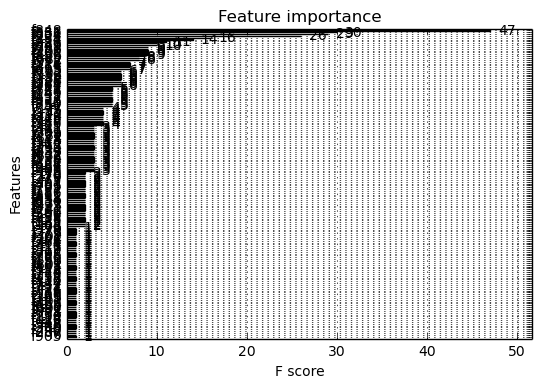

In [5]:
model = XGBClassifier()
model.fit(train, y)

#plot importance
plot_importance(model)
fig=pyplot.show()


In [7]:
y_pred = model.predict(test)
predictions = [round(value) for value in y_pred]
accuracy = matthews_corrcoef(y_test, predictions)
print("matthews_corrcoef: %f" % (accuracy ))


top_indices=(model.feature_importances_).argsort()[::-1][:15]  # finding top 15 feature indices

print top_indices 
features_list = list(train_numeric.columns.values)
for i in range(len(top_indices)):
    print "Top "+str(i)+" Features is  "+features_list[top_indices[i]] # finding the corresponding feature names

thresholds = sort(model.feature_importances_)
thresholds =thresholds[::-1]

k=0
important_features=[]
while k <15:
    important_features.append(thresholds[k])
    k+=1

print ("15 Most Important Features")
print important_features
# Help sought from http://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
count = 0
for thresh in thresholds:
    count+=1
    if(count==30):
        break
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y)
    # eval model
    select_X_test = selection.transform(test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = matthews_corrcoef(y_test, predictions)
    print accuracy
    print("Thresh=%.3f, n=%d, matthews_corrcoef: %f" % (thresh, select_X_train.shape[1], accuracy))

matthews_corrcoef: 0.113834
[848 338 851 304 735 854 756 883  49 726 292 849 781 296 682]
Top 0 Features is  L3_S31_F3846
Top 1 Features is  L1_S24_F1578
Top 2 Features is  L3_S33_F3857
Top 3 Features is  L1_S24_F1406
Top 4 Features is  L3_S29_F3348
Top 5 Features is  L3_S33_F3863
Top 6 Features is  L3_S29_F3427
Top 7 Features is  L3_S37_F3950
Top 8 Features is  L0_S9_F170
Top 9 Features is  L3_S29_F3321
Top 10 Features is  L1_S24_F1346
Top 11 Features is  L3_S32_F3850
Top 12 Features is  L3_S30_F3514
Top 13 Features is  L1_S24_F1366
Top 14 Features is  L2_S26_F3036
10 Most Important Features
[0.073322929, 0.046801873, 0.04524181, 0.040561624, 0.024960998, 0.021840874, 0.017160686, 0.015600624, 0.015600624, 0.014040561, 0.014040561, 0.014040561, 0.014040561, 0.014040561, 0.012480499]
0.0
Thresh=0.073, n=1, matthews_corrcoef: 0.000000
0.106916831468
Thresh=0.047, n=2, matthews_corrcoef: 0.106917
0.0674205421653
Thresh=0.045, n=3, matthews_corrcoef: 0.067421
0.0566509833904
Thresh=0.041,